In [1]:
import intake
import pyicon as pyic
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import yaml
import requests

----Start loading pyicon.
----Start loading pyicon.
----Pyicon was loaded successfully.
----Pyicon was loaded successfully.


## Load the intake catalog

In [2]:
catalog = 'https://modvis.dkrz.de/mh0033/m300602/xpp_catalog.yaml'
cat = intake.open_catalog(catalog)

List all simulations within the catalog:

In [3]:
cat

xpp_catalog:
  args:
    path: https://modvis.dkrz.de/mh0033/m300602/xpp_catalog.yaml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [4]:
list(cat)

['1950ctrl',
 'FC001_XPPslo1774',
 'dap010_r3b7-r2b9',
 'epoc2_004',
 'epoc2_007',
 'hel24213_r5b7_ctrl',
 'hel24282_r3b7_ctrl',
 'mss0008_r5b8_ctrl',
 'mss0009_r5b8',
 'slo1641',
 'slo1751_ltke']

## Obtain an xarray dataset from catalog

Decide for one simulation and list all available tags:

In [5]:
run = 'slo1641'

In [6]:
response = requests.get(catalog)
yaml_data = yaml.safe_load(response.text)
yaml_data['sources'][run]['parameters']['tag']['allowed']

['atm_2d_ml',
 'atm_3d_ml',
 'atm_alb',
 'atm_mon',
 'jsb_2d',
 'jsb_wbal',
 'lnd_mon',
 'oce_dbg',
 'oce_def',
 'oce_ice',
 'oce_moc',
 'oce_mon',
 'oce_ssh',
 'oce_zos']

Load the data:

In [7]:
%%time
ds = cat[run](tag="oce_def", chunks={'time': 10, 'depth': 1, 'depth_2': 1}, combine='nested', concat_dim='time',).to_dask()

CPU times: user 2.6 s, sys: 537 ms, total: 3.14 s
Wall time: 6.1 s


## Simple plotting

Make a simple scatter plot:

Text(0.5, 1.0, 'sea water potential temperature / deg C')

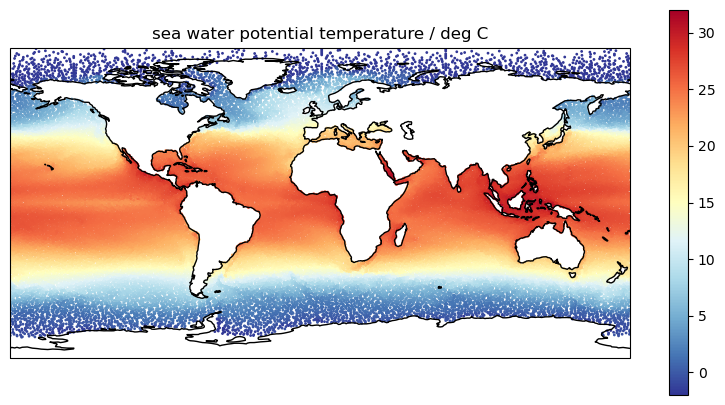

In [8]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
nskip = 5
da = ds.to.isel(depth=0, time=0)
da = da.where(da!=0)
hm = ax.scatter(np.rad2deg(ds.clon[::nskip]), np.rad2deg(ds.clat[::nskip]), c=da[::nskip], s=1, cmap='RdYlBu_r', vmin=-2, vmax=32)
plt.colorbar(mappable=hm)
ax.set_extent([-180,180,-90,90])
ax.coastlines()
ax.set_title(f'{da.long_name} / {da.units}')

Make a simple pyicon plot

/home/m/m300602/pyicon/pyicon/pyicon_plotting.py:2132: UserWarning: Coordinates are being inferred. If the resulting plot looks 
unreasonable try setting `coordinates` kwarg explicitly.
  warnings.warn(


(<GeoAxesSubplot:title={'left':'depth = 1.0 m','right':'1801-01-01T00:00:00'}>,
  <matplotlib.colorbar.Colorbar at 0x7fff77bc6350>])

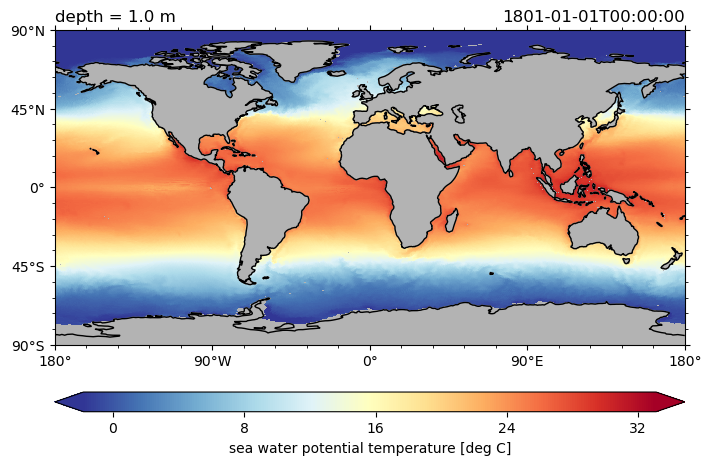

In [9]:
ds.to.isel(depth=0, time=0).pyic.plot()